In [1]:
# import the dependencies.
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# create random latitudes and longitudes

lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#for coordidate in coordinates:
 #   print(coordidate[0], coordidate[1])
    

In [5]:
# create list to hold cities name

cities = []

# identify nearest city name for each latitude and longitude

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # if the city is unique, then we will add the city name
    
    if city not in cities:
        cities.append(city)

# print the cities count to confirm the total cities.
    
len(cities)

628

In [6]:
# import the request library

import requests

# import API key for weather

from config import weather_api_key

In [7]:
# starting URL in for API call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b05f7fd70b27a65f0aff26106c1f0dca


In [8]:
# import the time library and the datetime module from the datetime library

import time
from datetime import datetime


In [9]:
# create an empty list.

city_data = []

# print beginning.

print("Beginning Data Retrieval")
print("_________________________")

# create the counters.

record_count = 1

set_count = 1

# loop to retrive the cities data

#for i in range(len(cities)):
 
for i, city in enumerate(cities):
    
    # group the cities in set of 50 for logging purpose
    if (i % 50 == 0 and i >=50):
        
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # creat endpoint URL with each city
    
    city_url= url +"&q="+ city.replace(" ","+")
    
    
    #log the URL, record and set numbers and the city
    
    print(f"Processing Record {record_count} of set {set_count} | {city}")
          
    # Add 1 to the record count.
          
    record_count +=1
          
    # run an API request for each city
          
    try:
        # parse the JSON and retrive data.
          
        city_weather = requests.get(city_url).json()
          
        # parse out the needed data
          
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
          
        #convert date in to the ISO format
          
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          
        #append the city information in to list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Clouldiness" : city_cloud,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
          
        # if an error is experienced, skip the city.
          
    except:
        print(f"City not found {city}")
        pass
          
# indicate theat data loading is completed.
          
print("________________________")

print("Data Retrieval Completed")
          
print("________________________")


Beginning Data Retrieval
_________________________
Processing Record 1 of set 1 | lebu
Processing Record 2 of set 1 | qaanaaq
Processing Record 3 of set 1 | jamestown
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | pisco
Processing Record 6 of set 1 | carnarvon
Processing Record 7 of set 1 | busselton
Processing Record 8 of set 1 | mataura
Processing Record 9 of set 1 | lolua
City not found lolua
Processing Record 10 of set 1 | boende
Processing Record 11 of set 1 | punta arenas
Processing Record 12 of set 1 | airai
Processing Record 13 of set 1 | butaritari
Processing Record 14 of set 1 | portobelo
Processing Record 15 of set 1 | barrow
Processing Record 16 of set 1 | cape town
Processing Record 17 of set 1 | lipari
Processing Record 18 of set 1 | constitucion
Processing Record 19 of set 1 | goundi
Processing Record 20 of set 1 | adrar
Processing Record 21 of set 1 | waingapu
Processing Record 22 of set 1 | hamilton
Processing Record 23 of set 1 | mahebourg
Proce

Processing Record 43 of set 4 | jijiga
Processing Record 44 of set 4 | biggar
Processing Record 45 of set 4 | ozernovskiy
Processing Record 46 of set 4 | chara
Processing Record 47 of set 4 | norman wells
Processing Record 48 of set 4 | kaitangata
Processing Record 49 of set 4 | horasan
Processing Record 50 of set 4 | nanortalik
Processing Record 1 of set 5 | tayoltita
Processing Record 2 of set 5 | kshenskiy
Processing Record 3 of set 5 | kapuskasing
Processing Record 4 of set 5 | taoudenni
Processing Record 5 of set 5 | tuy hoa
Processing Record 6 of set 5 | palana
Processing Record 7 of set 5 | catuday
Processing Record 8 of set 5 | camacha
Processing Record 9 of set 5 | junin
Processing Record 10 of set 5 | innisfail
Processing Record 11 of set 5 | barentsburg
City not found barentsburg
Processing Record 12 of set 5 | nelson bay
Processing Record 13 of set 5 | nouakchott
Processing Record 14 of set 5 | okhotsk
Processing Record 15 of set 5 | traverse city
Processing Record 16 of se

Processing Record 28 of set 8 | beoumi
Processing Record 29 of set 8 | benguela
Processing Record 30 of set 8 | road town
Processing Record 31 of set 8 | calabozo
Processing Record 32 of set 8 | codrington
Processing Record 33 of set 8 | suao
City not found suao
Processing Record 34 of set 8 | zapolyarnyy
Processing Record 35 of set 8 | ler
Processing Record 36 of set 8 | shitkino
Processing Record 37 of set 8 | deputatskiy
Processing Record 38 of set 8 | faro
Processing Record 39 of set 8 | kohtla-jarve
Processing Record 40 of set 8 | acapulco
Processing Record 41 of set 8 | rocha
Processing Record 42 of set 8 | tilichiki
Processing Record 43 of set 8 | sambava
Processing Record 44 of set 8 | mitu
Processing Record 45 of set 8 | namatanai
Processing Record 46 of set 8 | hobyo
Processing Record 47 of set 8 | kupang
Processing Record 48 of set 8 | kerman
Processing Record 49 of set 8 | bud
Processing Record 50 of set 8 | bilma
Processing Record 1 of set 9 | boralday
Processing Record 2 

Processing Record 17 of set 12 | port hedland
Processing Record 18 of set 12 | pueblo
Processing Record 19 of set 12 | san patricio
Processing Record 20 of set 12 | lasa
Processing Record 21 of set 12 | dothan
Processing Record 22 of set 12 | lishui
Processing Record 23 of set 12 | lompoc
Processing Record 24 of set 12 | bakel
Processing Record 25 of set 12 | lavrentiya
Processing Record 26 of set 12 | tambacounda
Processing Record 27 of set 12 | muslyumovo
Processing Record 28 of set 12 | dicabisagan
Processing Record 29 of set 12 | reitz
Processing Record 30 of set 12 | bolshaya murta
City not found bolshaya murta
Processing Record 31 of set 12 | grootfontein
Processing Record 32 of set 12 | bauchi
Processing Record 33 of set 12 | tucuma
Processing Record 34 of set 12 | bay city
Processing Record 35 of set 12 | tukums
Processing Record 36 of set 12 | makung
City not found makung
Processing Record 37 of set 12 | burias
Processing Record 38 of set 12 | lohardaga
Processing Record 39 of

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouldiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,52.54,90,3,2.98,CL,2022-11-15 08:07:11
1,Qaanaaq,77.4840,-69.3632,0.82,82,100,2.89,GL,2022-11-15 08:07:11
2,Jamestown,42.0970,-79.2353,35.19,80,100,8.05,US,2022-11-15 08:06:57
3,Ushuaia,-54.8000,-68.3000,49.66,81,75,5.75,AR,2022-11-15 08:06:26
4,Pisco,-13.7000,-76.2167,62.65,82,75,2.30,PE,2022-11-15 08:07:11
5,Carnarvon,-24.8667,113.6333,79.00,51,1,17.98,AU,2022-11-15 08:07:12
6,Busselton,-33.6500,115.3333,70.27,48,0,13.40,AU,2022-11-15 08:04:08
7,Mataura,-46.1927,168.8643,58.48,63,100,1.12,NZ,2022-11-15 08:07:12
8,Boende,-0.2167,20.8667,77.85,91,100,0.69,CD,2022-11-15 08:07:12
9,Punta Arenas,-53.1500,-70.9167,48.11,66,64,19.42,CL,2022-11-15 08:02:36


In [11]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Clouldiness','Wind Speed']]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouldiness,Wind Speed
0,Lebu,CL,2022-11-15 08:07:11,-37.6167,-73.6500,52.54,90,3,2.98
1,Qaanaaq,GL,2022-11-15 08:07:11,77.4840,-69.3632,0.82,82,100,2.89
2,Jamestown,US,2022-11-15 08:06:57,42.0970,-79.2353,35.19,80,100,8.05
3,Ushuaia,AR,2022-11-15 08:06:26,-54.8000,-68.3000,49.66,81,75,5.75
4,Pisco,PE,2022-11-15 08:07:11,-13.7000,-76.2167,62.65,82,75,2.30
...,...,...,...,...,...,...,...,...,...
569,Hay River,CA,2022-11-15 08:21:35,60.8156,-115.7999,26.58,80,40,5.75
570,Ilesha,NG,2022-11-15 08:21:35,7.1371,5.2583,79.43,62,100,1.61
571,Tarauaca,BR,2022-11-15 08:21:35,-8.1614,-70.7656,71.69,94,91,2.44
572,Muisne,EC,2022-11-15 08:21:36,0.6000,-80.0333,72.77,86,98,6.02


In [12]:
#  create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# export the data

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Etract data for scatter plot

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Clouldiness"]
wind_speed = city_data_df["Wind Speed"]


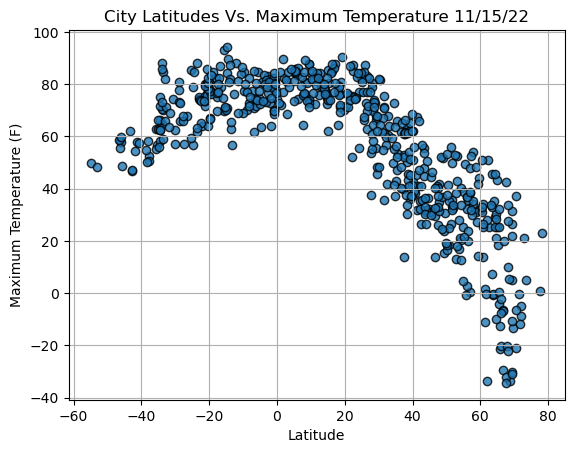

In [14]:
# import time module
import time
#%matplotlib



# build the scatter plot for latitudes vs max. temp.

plt.scatter(lats, max_temps,
           edgecolor="black",
           linewidths=1, marker="o",
           alpha =0.8, label="Cities")


# add additional properties

plt.title(f"City Latitudes Vs. Maximum Temperature "+ time.strftime("%x"))
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure.

plt.savefig("weather_data/Scatter_lat_Vs_maxtemp.png")

# Show plot

plt.show()



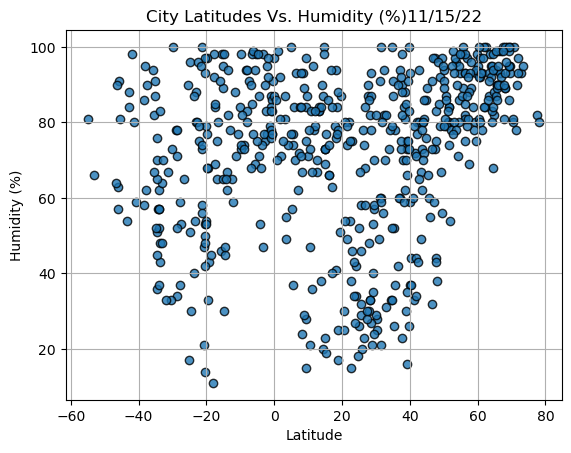

In [15]:
# build the scatter plot for latitudes vs Humidity.

plt.scatter(lats, humidity,
           edgecolor="black",
           linewidths=1, marker="o",
           alpha =0.8, label="Cities")


# add additional properties

plt.title(f"City Latitudes Vs. Humidity (%)"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure.

plt.savefig("weather_data/Scatter_lat_Vs_humidity.png")

# Show plot
plt.show()




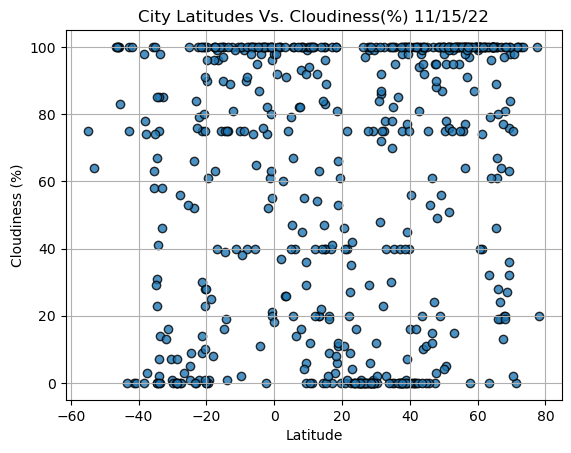

In [16]:
# build the scatter plot for latitudes vs Cloudiness.

plt.scatter(lats, cloudiness,
           edgecolor="black",
           linewidths=1, marker="o",
           alpha =0.8, label="Cities")


# add additional properties

plt.title(f"City Latitudes Vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure.

plt.savefig("weather_data/Scatter_lat_Vs_cloudiness.png")

# Show plot
plt.show()




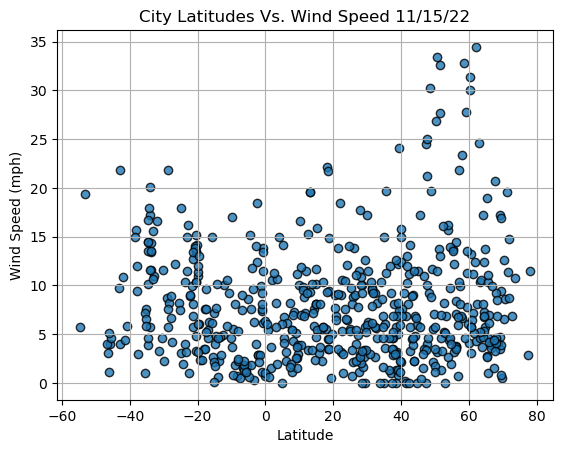

<Figure size 640x480 with 0 Axes>

In [17]:
# build the scatter plot for latitudes vs Wind Speed.

plt.scatter(lats, wind_speed,
           edgecolor="black",
           linewidths=1, marker="o",
           alpha =0.8, label="Cities")


# add additional properties

plt.title(f"City Latitudes Vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure.

plt.savefig("weather_data/Scatter_lat_Vs_windspeed.png")

# Show plot
plt.show()
plt.tight_layout()


In [18]:
# import linear regression from te SciPy stats module.

#import matplotlib.pyplot as plt
from scipy.stats import linregress

# create a function to perform linear regression on the weather data
# plot the regression line with equation

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
   # perform linear regression

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calcualte y value from regression
    
    regress_values = x_values * slope + intercept
    
    # the line equation
    
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    print(line_eq)

    print(f" The p-value & r-value & standard error is : {p_value:.3f} {r_value:.3f} {std_err:.3f}")
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.rcParams["figure.figsize"] = (10,6)
   
    
    plt.plot(x_values,regress_values,"r")
        
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()
    
    
    
     
    

In [19]:
# extract the north hemispher data

north_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
north_hemi_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouldiness,Wind Speed
1,Qaanaaq,GL,2022-11-15 08:07:11,77.4840,-69.3632,0.82,82,100,2.89
2,Jamestown,US,2022-11-15 08:06:57,42.0970,-79.2353,35.19,80,100,8.05
11,Butaritari,KI,2022-11-15 08:07:13,3.0707,172.7902,80.85,81,26,8.21
12,Portobelo,PA,2022-11-15 08:07:13,9.5500,-79.6500,74.05,87,99,2.93
13,Barrow,US,2022-11-15 08:07:13,71.2906,-156.7887,-0.38,78,0,19.57
...,...,...,...,...,...,...,...,...,...
568,Srednekolymsk,RU,2022-11-15 08:21:35,67.4500,153.6833,-34.37,99,13,4.36
569,Hay River,CA,2022-11-15 08:21:35,60.8156,-115.7999,26.58,80,40,5.75
570,Ilesha,NG,2022-11-15 08:21:35,7.1371,5.2583,79.43,62,100,1.61
572,Muisne,EC,2022-11-15 08:21:36,0.6000,-80.0333,72.77,86,98,6.02


In [20]:
# extract the north hemispher data

south_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]
south_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouldiness,Wind Speed
0,Lebu,CL,2022-11-15 08:07:11,-37.6167,-73.6500,52.54,90,3,2.98
3,Ushuaia,AR,2022-11-15 08:06:26,-54.8000,-68.3000,49.66,81,75,5.75
4,Pisco,PE,2022-11-15 08:07:11,-13.7000,-76.2167,62.65,82,75,2.30
5,Carnarvon,AU,2022-11-15 08:07:12,-24.8667,113.6333,79.00,51,1,17.98
6,Busselton,AU,2022-11-15 08:04:08,-33.6500,115.3333,70.27,48,0,13.40
...,...,...,...,...,...,...,...,...,...
560,Haapiti,PF,2022-11-15 08:21:33,-17.5667,-149.8667,76.73,84,100,9.66
561,Richards Bay,ZA,2022-11-15 08:21:33,-28.7830,32.0377,77.92,52,0,5.70
563,Tiarei,PF,2022-11-15 08:21:33,-17.5333,-149.3333,77.02,85,100,7.63
565,Kieta,PG,2022-11-15 08:21:34,-6.2167,155.6333,80.33,77,74,2.21


y =-1.26x +96.84
 The p-value & r-value & standard error is : 0.000 -0.866 0.037


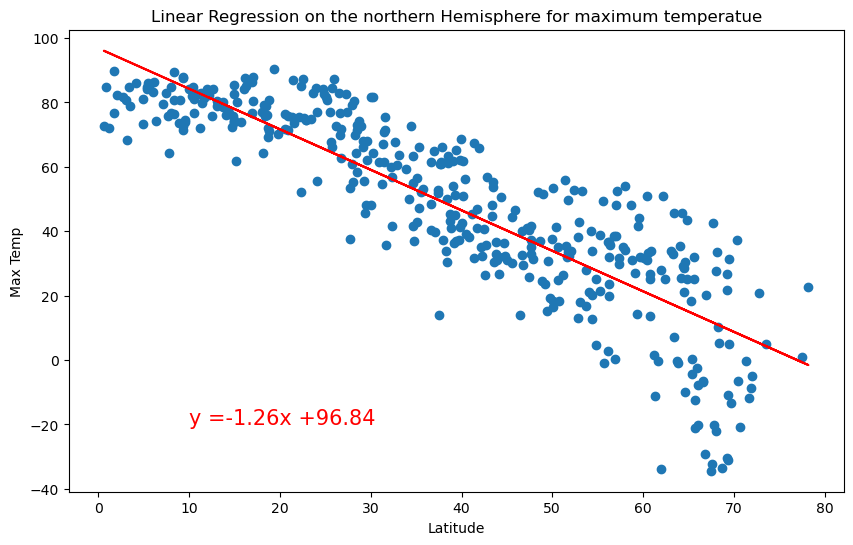

<Figure size 1000x600 with 0 Axes>

In [23]:
#%matplotlib qt


# Linear regaression on the northern hemisphere and max temperature

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]

# call the function


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere for maximum temperatue', 
                       'Max Temp', (10,-20))

plt.savefig("weather_data/Scatter_northlat_Vs_maxtemp_regression.png")



y =0.46x +81.39
 The p-value & r-value & standard error is : 0.000 0.593 0.047


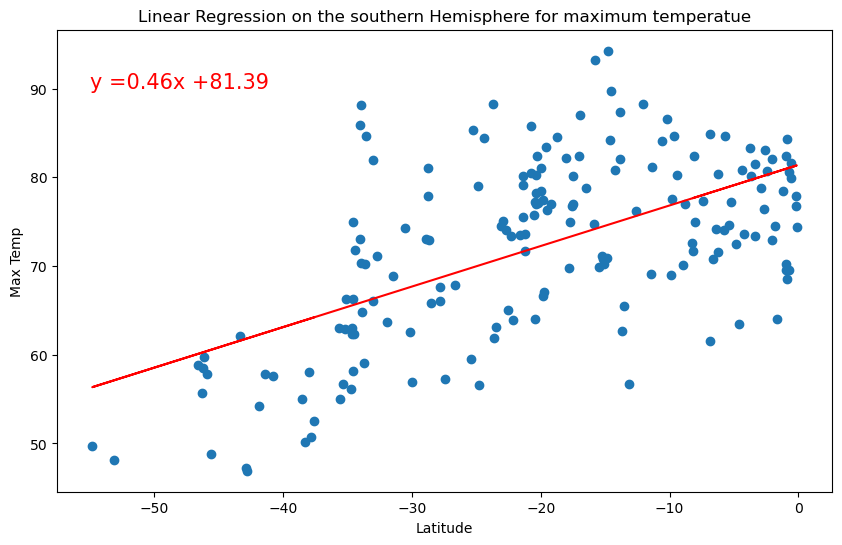

<Figure size 1000x600 with 0 Axes>

In [24]:

# Linear regaression on the southern hemisphere and max temperature

x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere for maximum temperatue', 
                       'Max Temp', (-55,90))

plt.savefig("weather_data/Scatter_southlat_Vs_maxtemp_regression.png")



y =0.47x +55.01
 The p-value & r-value & standard error is : 0.000 0.410 0.052


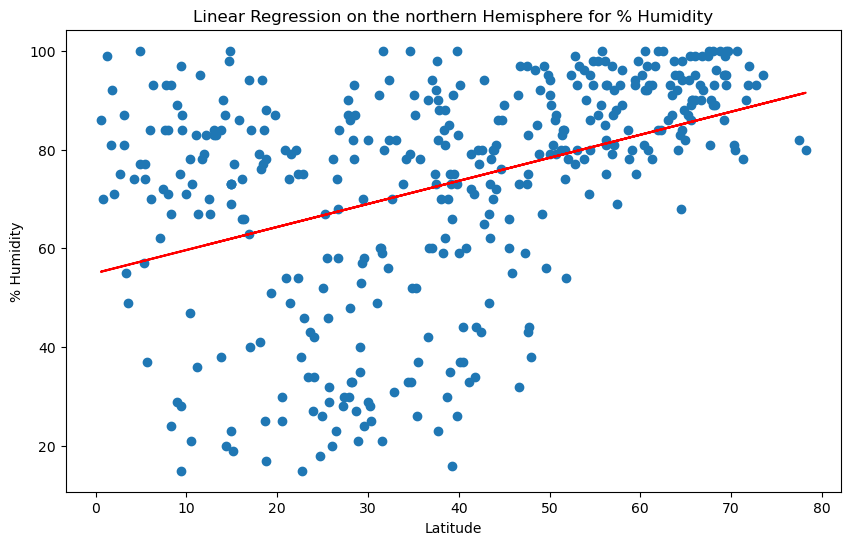

<Figure size 1000x600 with 0 Axes>

In [25]:
# Linear regaression on the northern hemisphere and Humidity

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]

# call the function


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere for % Humidity', 
                       '% Humidity', (50,10))

plt.savefig("weather_data/Scatter_northlat_Vs_Humidity_regression.png")


y =0.39x +79.38
 The p-value & r-value & standard error is : 0.001 0.256 0.110


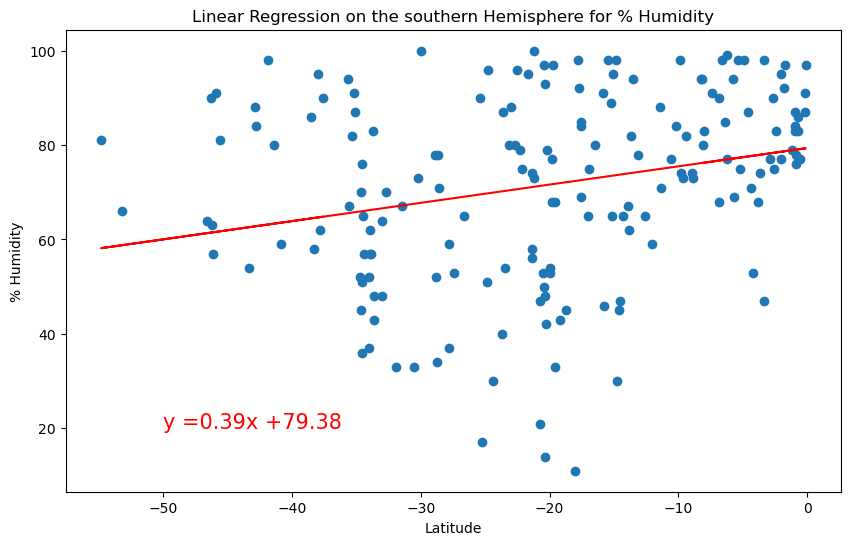

<Figure size 1000x600 with 0 Axes>

In [26]:
# Linear regaression on the southern hemisphere and Humidity

x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere for % Humidity', 
                       '% Humidity', (-50,20))

plt.savefig("weather_data/Scatter_southlat_Vs_Humidity_regression.png")


y =0.57x +37.8
 The p-value & r-value & standard error is : 0.000 0.276 0.100


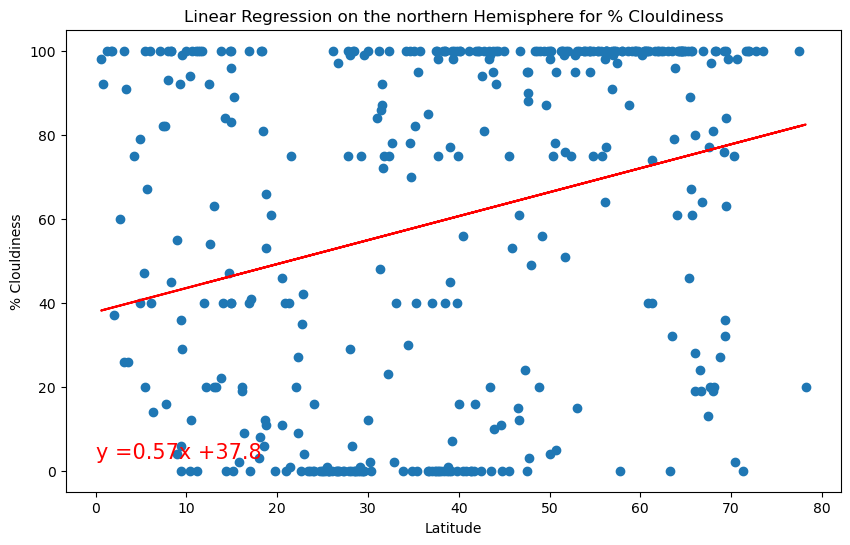

<Figure size 1000x600 with 0 Axes>

In [27]:
# Linear regaression on the northern hemisphere for cloudiness

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Clouldiness"]

# call the function


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere for % Clouldiness', 
                       '% Clouldiness', (0,3))

plt.savefig("weather_data/Scatter_northlat_Vs_Clouldiness_regression.png")

y =0.77x +75.54
 The p-value & r-value & standard error is : 0.000 0.261 0.217


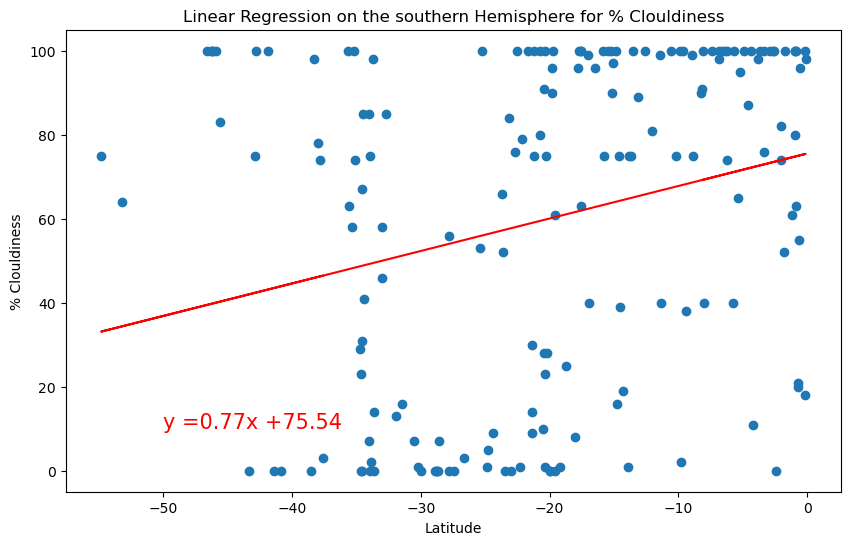

<Figure size 1000x600 with 0 Axes>

In [28]:
# Linear regaression on the southern hemisphere for Clouldiness

x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Clouldiness"]

# call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere for % Clouldiness', 
                       '% Clouldiness', (-50,10))

plt.savefig("weather_data/Scatter_southlat_Vs_Clouldiness_regression.png")



y =0.05x +6.2
 The p-value & r-value & standard error is : 0.004 0.144 0.016


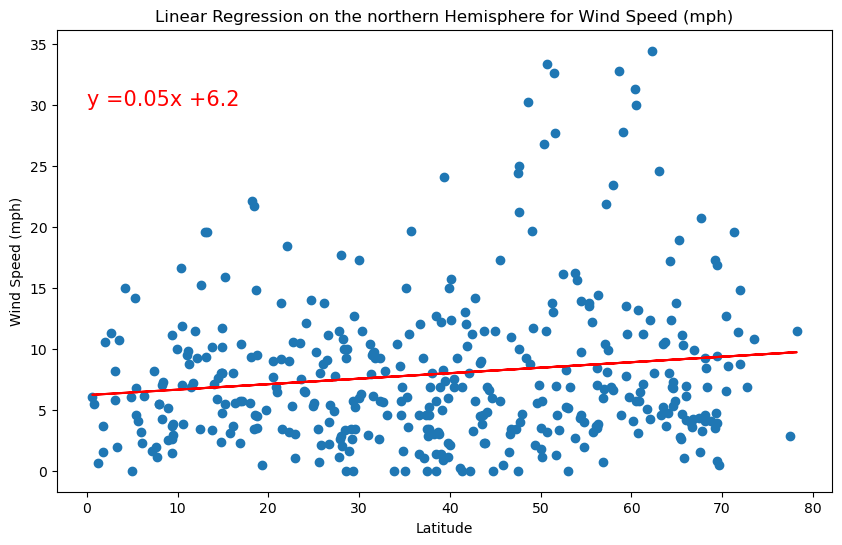

<Figure size 1000x600 with 0 Axes>

In [30]:
# Linear regaression on the northern hemisphere for Wind Speed

x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]

# call the function


plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere for Wind Speed (mph)', 
                       'Wind Speed (mph)', (0,30))

plt.savefig("weather_data/Scatter_northlat_Vs_Wind_Speed_regression.png")

y =-0.1x +5.7
 The p-value & r-value & standard error is : 0.000 -0.265 0.028


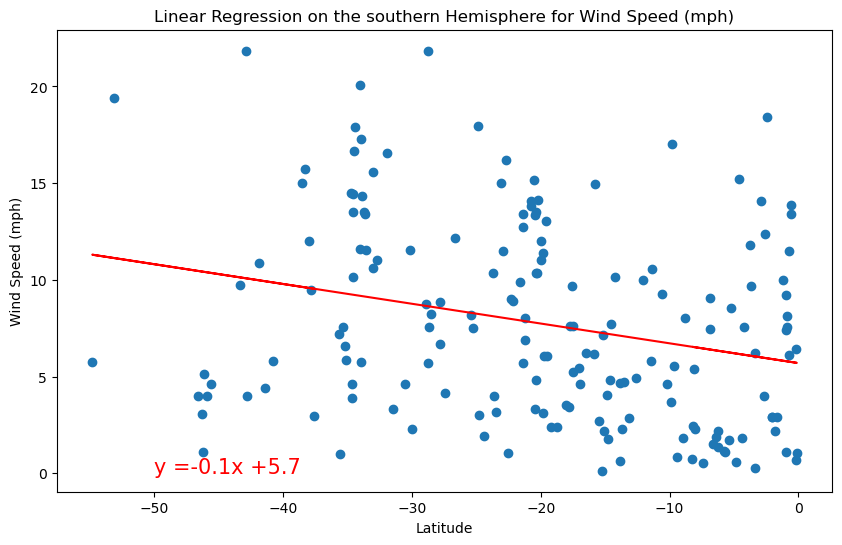

<Figure size 1000x600 with 0 Axes>

In [32]:
# Linear regaression on the southern hemisphere for Wind Speed

x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere for Wind Speed (mph)', 
                       'Wind Speed (mph)', (-50,0))

plt.savefig("weather_data/Scatter_southlat_Vs_windspeed_regression.png")